In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df_dollars = pd.read_csv('Restaurant data.csv')

In [3]:
df_percent = pd.read_csv('Percent Change.csv')
df_percent.head()

DATE  MRTSSM7225USN_PCH
0  2/1/1992            1.11820
1  3/1/1992            6.47172
2  4/1/1992           -1.95873
3  5/1/1992            7.19517
4  6/1/1992           -4.59641

In [4]:
df_dollars.rename(columns={'MRTSSM7225USN': 'Millions_Dollars', 'DATE': 'Date'}, inplace = True)
df_percent.rename(columns = {'MRTSSM7225USN_PCH':'Percent_Change', 'DATE':'Date'}, inplace = True)

Text(0.5, 1.0, ' Restaurant Sales (1992-2020)')

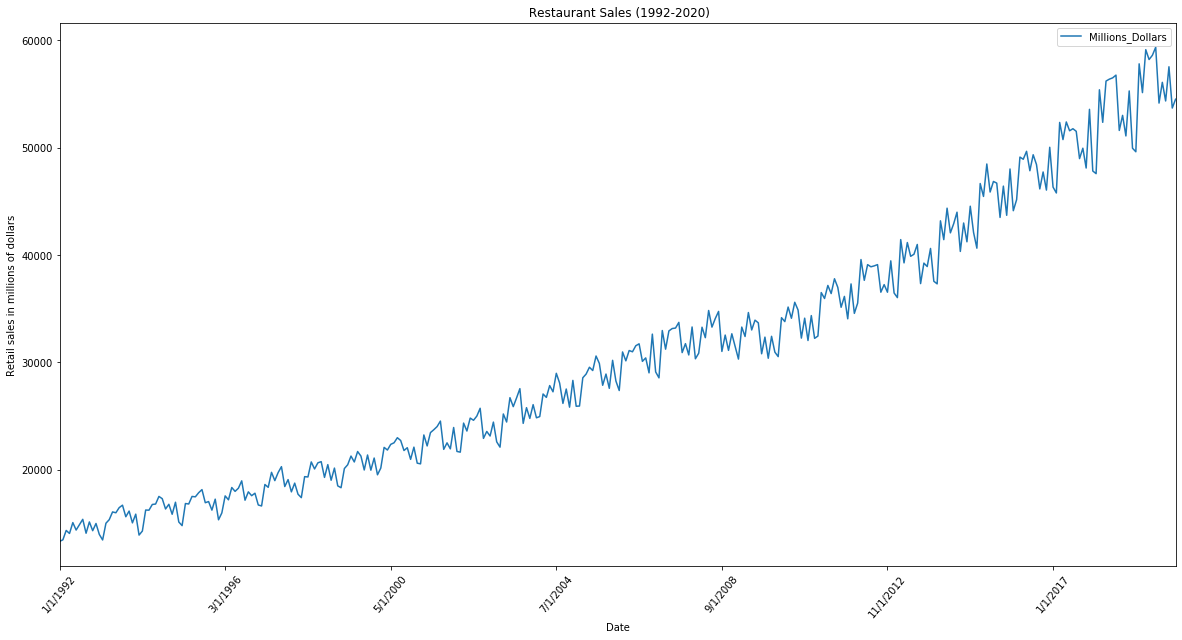

In [5]:
fig =df_dollars.plot.line(x='Date',rot=50,figsize=(20,10))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title(' Restaurant Sales (1992-2020)')

In [6]:
inflation = pd.read_csv('inflation_values.csv')


In [7]:
inflation.head()
inflation.shape

(339, 3)

In [8]:
inflation.rename(columns={'Unnamed: 0':'year'}, inplace=True)
inflation = inflation.fillna(0)
inflation = inflation.astype({'year':int})
inflation.set_index('year')

inflation rate in %  adjusted inflation
year                                        
0                  0.15%            0.998500
1                  0.36%            0.994905
2                  0.51%            0.989831
3                  0.14%            0.988446
4                  0.14%            0.987062
...                  ...                 ...
334               -0.05%            0.533561
335               -0.09%            0.534041
336                0.39%            0.531958
337                0.27%            0.530522
338               -0.22%            0.531689

[339 rows x 2 columns]

In [9]:
restaurant_sales = df_dollars.assign(inflation = inflation['inflation rate in %']) 
restaurant_sales = df_dollars.assign(inflation_adjusted = inflation['adjusted inflation']) 
restaurant_sales.head()

Date  Millions_Dollars  inflation_adjusted
0  1/1/1992             13325            0.998500
1  2/1/1992             13474            0.994905
2  3/1/1992             14346            0.989831
3  4/1/1992             14065            0.988446
4  5/1/1992             15077            0.987062

In [10]:
restaurant_inflated = []
for ind, row in restaurant_sales.iterrows():
    if (ind == 0):
        sales = restaurant_sales.loc[ind, 'Millions_Dollars'] 
        restaurant_inflated.append(sales)
    elif (ind == 339): 
        continue
    else:
        sales = restaurant_sales.loc[ind, 'Millions_Dollars']
        percent_inflation = (restaurant_sales.loc[ind-1, 'inflation_adjusted']) 
        adjusted = sales * percent_inflation
        restaurant_inflated.append(adjusted)

In [11]:
restaurant_sales = restaurant_sales.assign(restaurant_adjusted = restaurant_inflated)
restaurant_sales.head()

Date  Millions_Dollars  inflation_adjusted  restaurant_adjusted
0  1/1/1992             13325            0.998500         13325.000000
1  2/1/1992             13474            0.994905         13453.789000
2  3/1/1992             14346            0.989831         14272.912868
3  4/1/1992             14065            0.988446         13921.978394
4  5/1/1992             15077            0.987062         14902.794590

Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

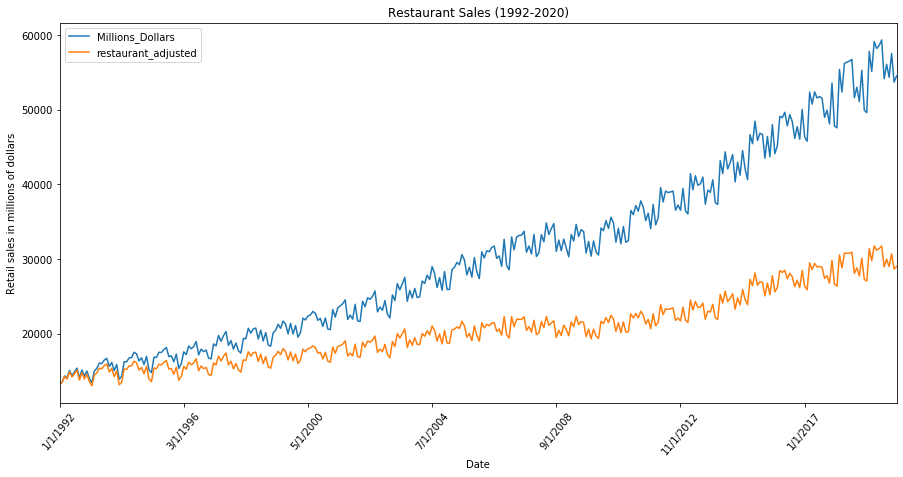

In [13]:
fig = restaurant_sales.plot.line(x='Date',y=['Millions_Dollars','restaurant_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Restaurant Sales (1992-2020)')

Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

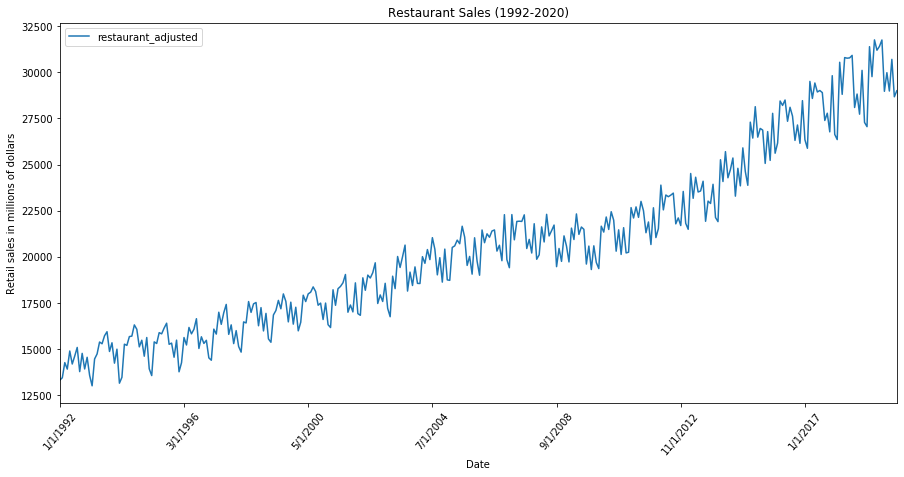

In [15]:
fig = restaurant_sales.plot.line(x='Date',y=['restaurant_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Restaurant Sales (1992-2020)')